<a href="https://colab.research.google.com/github/Sushant20022/Calories-Burnt-Predictor-/blob/master/calorioe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 Importing Necessary Libraries and  Modules**


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import warnings 
warnings.filterwarnings('ignore')

## **2 Reading the Dataset from CSV Files as Pandas Dataframe : Data Collection**

### 2.1 Exercise DataSet(Exercise.csv)

In [71]:
exercise = pd.read_csv("data/exercise.csv")
exercise.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


### 2.2 Calories Dataset (calories.csv)

In [72]:
calories = pd.read_csv("data/calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


### 2.3 Joining to create the Final Dataset (dataset)

In [73]:
dataset=pd.concat(objs=[exercise,calories],axis=1)

dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


# **3 DataSet Analysis and Modification**

### 3.1 Removing Duplicate USERID column from the Dataset

In [74]:
dataset = dataset.loc[:, ~dataset.columns.duplicated()]
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### DataSet Information -:
1) USER_ID : Unique User_ID representing a Person recording their Information regarding various fields required to calculate Calories.
2) Gender : Categorical Column that shows Gender of that Person.
3) Age : Field showing the Age of that person.
4) Height : Entries for Physical Height of their body [in centimeters(cm)].
5) Weight : Column to record the weight of that person [in kilograms(kgs)].
6) Duration : Column that tells about the duration of their Workout Session (in minutes). 
7) Heart_Rate : This column tells us about the average HeartBeat Rate of that person during the Workout Session (in beats per minute (bpm)).
8) Body_Temp : This Column tells about the Temprature of that Person's Body After the Workout Session (in Degree Celsius (°C)).
9) Calories : This tells us about the Final number of Calories burnt after the Workout Session 




### Additional : Saving Dataset after Concatinating 2 Datasets

In [75]:
paths= "C:/Users/Sushant/Downloads/Codes/projectfolder_Calories/data/dataset.csv"
if not os.path.exists(paths):
    dataset.to_csv(paths,index=False)
    print("Dataset Saved at :", paths)
else:
    print("Already Saved Dataset")


Already Saved Dataset


### 3.2 Checking for Missing Values

In [76]:
dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### 3.3 Describing the Dataset

In [77]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [78]:
print("The unique values in 'Gender' column are ",end=" ")
print(dataset['Gender'].unique())
print("Rest are numerical Columns with a Lot of Unique Values")


The unique values in 'Gender' column are  ['male' 'female']
Rest are numerical Columns with a Lot of Unique Values


## 3.4 Feature Engineering

**3.4.1 Adding a BMI column in Dataset** 

In [79]:
def calculate_bmi(row):
    """Calculate BMI given weight in kilograms and height in centimeters."""
    weight_kg = row['Weight']
    height_cm = row['Height']
    height_m = height_cm / 100  # Convert height from cm to m
    bmi = weight_kg / (height_m ** 2)
    return bmi

# Apply calculate_bmi function to each row
dataset['BMI'] = dataset.apply(calculate_bmi, axis=1)


**3.4.2 Adding a Calories Burnt per Minute Column**

In [80]:
def calculate_cpm(row):
    """Calculate BMI given weight in kilograms and height in centimeters."""
    Duration_min = row['Duration']
    Calories = row['Calories']
    Calorie_per_minute = Calories / Duration_min  # Convert height from cm to m

    return Calorie_per_minute
dataset['Calorie_Per_Min']= dataset.apply(calculate_cpm,axis=1)


### 3.5 Numerical Vs Categorial Columns

In [81]:
numerical_columns = [x for x in dataset.columns if dataset[x].dtype!='object']
categorical_columns = [x for x in dataset.columns if  dataset[x].dtype=='object']
print("There are {} Numerical Columns in the Dataset : ".format(len(numerical_columns)),numerical_columns)
print("There are {} Numerical Column(s) in the Dataset : ".format(len(categorical_columns)),categorical_columns)


There are 10 Numerical Columns in the Dataset :  ['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Calorie_Per_Min']
There are 1 Numerical Column(s) in the Dataset :  ['Gender']


# **4 Evaluationary Data Visualization and Analysis**

### 4.1 Univariate Analysis

**4.1.1 Visualizing Age Column**

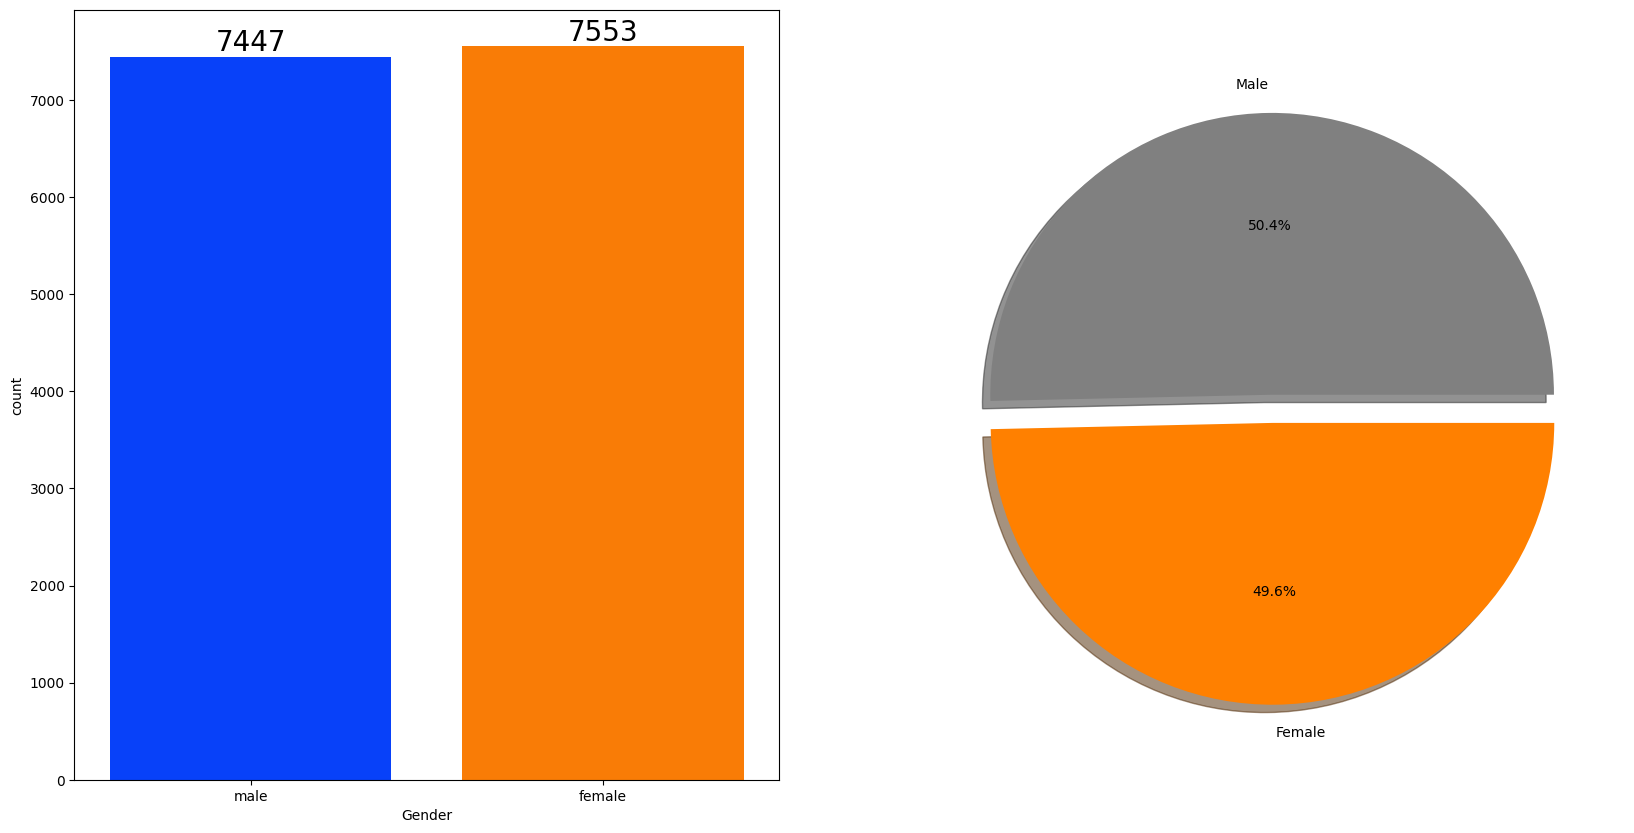

Absolute value for each Gender category is Gender
female    7553
male      7447
Name: count, dtype: int64


In [82]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['Gender'],data=dataset,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=dataset['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#808080','#ff8000'])
plt.show()

print("Absolute value for each Gender category is", end=" ")
print(dataset['Gender'].value_counts())

DataSet is Evenly Distributed for Both Genders as they've almost similar Entries for both Categories (MALE AND FEMALE)

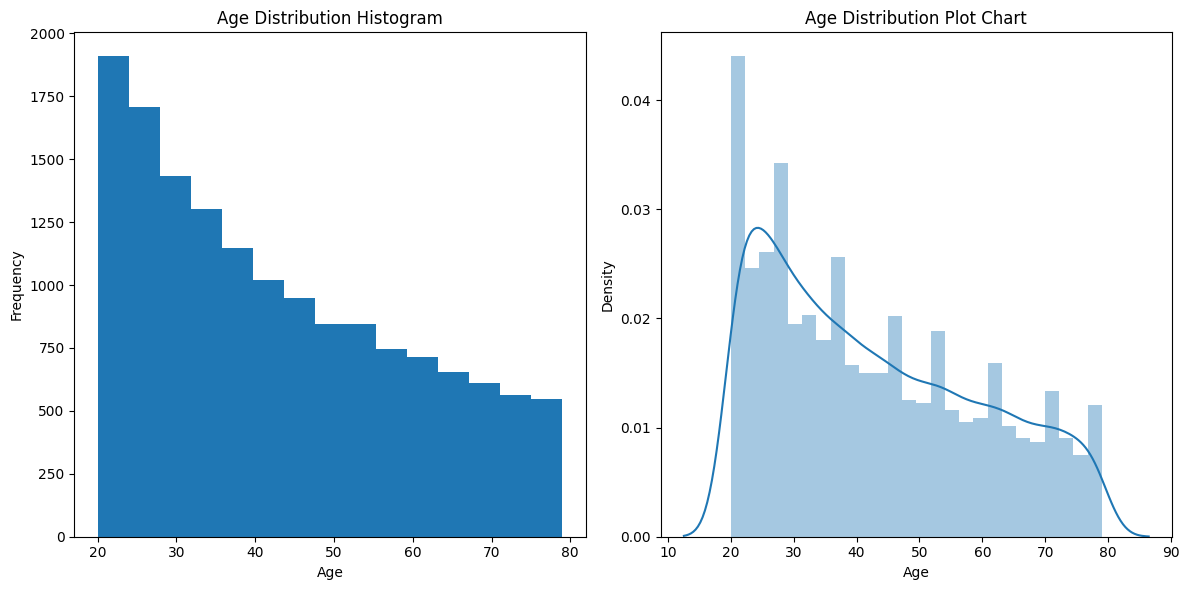

In [83]:
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(12, 6))  # 1 row, 2 columns

# Plot on the first axis
ax1.hist(dataset['Age'], bins=15, label='Age')
ax1.set_title('Age Distribution Histogram')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

# Plot on the second axis
ax2=sns.distplot(dataset['Age'])
ax2.set_title('Age Distribution Plot Chart')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


In [84]:

young_adult = 0
Adults = 0
Elderly = 0
def age_group():
    global young_adult, Adults, Elderly
    
    for age in dataset['Age']:
        if age >= 20 and age <= 29:
            young_adult += 1
        elif age >= 30 and age <= 64:
            Adults += 1
        else:
            Elderly += 1

# Call the function to calculate age groups
age_group()


print("Young Adults:", young_adult)
print("Adults:", Adults)
print("Elderly:", Elderly)


Young Adults: 4387
Adults: 8411
Elderly: 2202


We can clearly see the maximum Participants in this Dataset lie in the age bracket of 20-25 , which keeps on decreasing as Age increases.

MIN AGE= 20 |
MAX AGE = 79|
MEAN AGE = 42     

Also Adults(30-64) with a count of (8411) are majority in this DataSet

followed by Young Adults(20-29)                             Count: 4387

and finally Elderly (65+)                                   count: 2202

**4.1.2 Visualizing Weight Column**

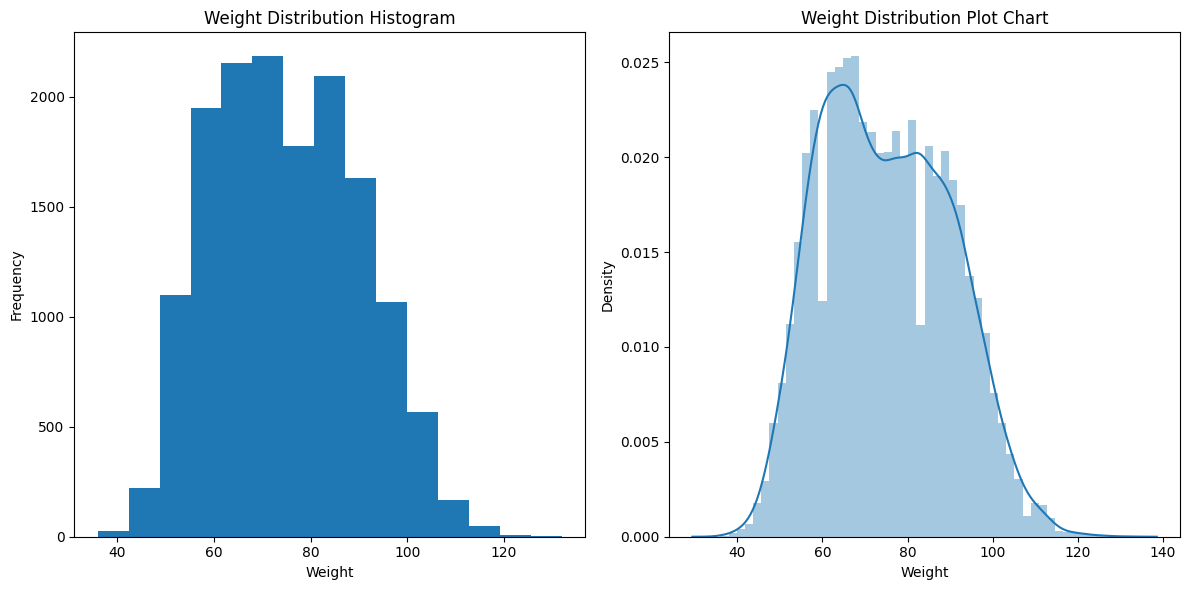

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(12, 6))

# Plot on the first axis
ax1.hist(dataset['Weight'], bins=15, label='Age')
ax1.set_title('Weight Distribution Histogram')
ax1.set_xlabel('Weight')
ax1.set_ylabel('Frequency')

# Plot on the second axis
ax2=sns.distplot(dataset['Weight'])
ax2.set_title('Weight Distribution Plot Chart')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [86]:

def weight_range():
    '''Function to Count the Total Number of People in different Weight Ranges based upon BMI'''
    Underweight=Healthy=Overweight=Obese=0
    for bmi in dataset['BMI']:
        if bmi < 18.5:
            Underweight+=1
        elif 18.5 <= bmi < 25:
            Healthy+=1
        elif 25 <= bmi < 30:
            Overweight+=1
        else:
            Obese+=1
    print("Total Underweight People are :",Underweight)
    print("Total Healthy People are :",Healthy)
    print("Total Overweight People are :",Overweight)
    print("Total Obese People are :",Obese)

weight_range()

    

Total Underweight People are : 0
Total Healthy People are : 9792
Total Overweight People are : 5208
Total Obese People are : 0


The Weight Values are Evenly Distributed , with very fewer values at edges (100kg+ and <50kg)

MAX WEIGHT | 132 kg 

AVERAGE WEIGHT | 74 kg

MINIMUM WEIGHT | 36 kg




**4.1.3 Visualizing Height Column**

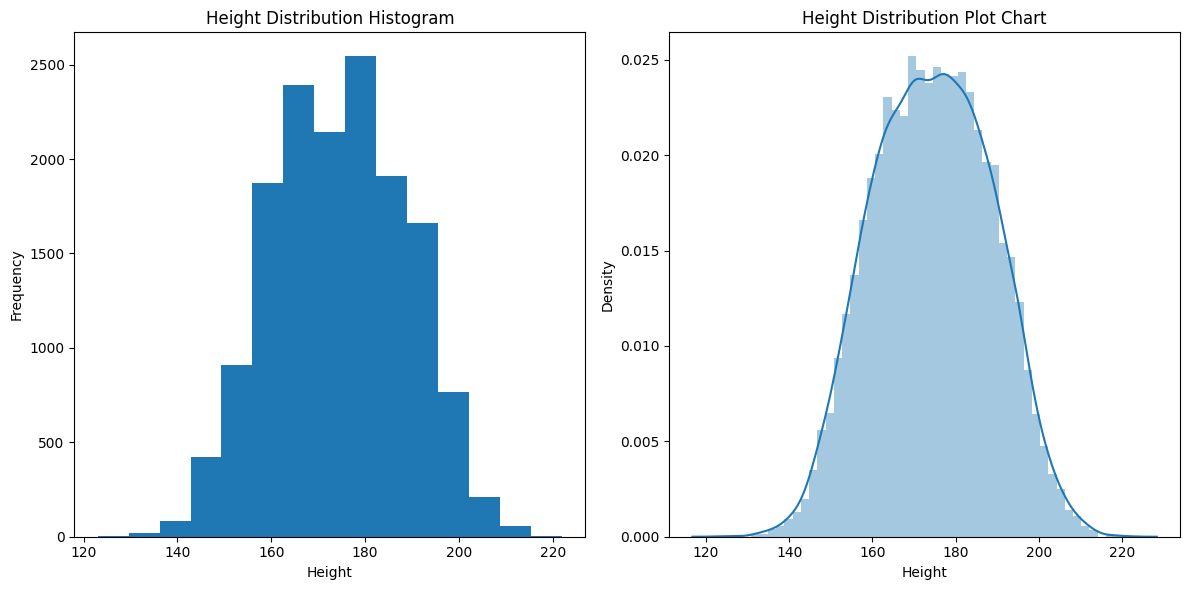

In [87]:
fig, (ax1, ax2) = plt.subplots(1,2 , figsize=(12, 6))

# Plot on the first axis
ax1.hist(dataset['Height'], bins=15, label='Age')
ax1.set_title('Height Distribution Histogram')
ax1.set_xlabel('Height')
ax1.set_ylabel('Frequency')

# Plot on the second axis
ax2=sns.distplot(dataset['Height'])
ax2.set_title('Height Distribution Plot Chart')

plt.tight_layout()
plt.show()

In [88]:
def categorize_height():
    Short=Medium=Tall=Very_Tall=0
    for height in dataset['Height']:
        if height < 150:
            Short+=1
        elif 150 <= height < 170:
            Medium+=1
        elif 170 <= height < 190:
            Tall+=1
        else:
            Very_Tall+=1
    print("Short People :",Short)
    print("Medium People :",Medium)
    print("Tall People :",Tall)
    print("Very Tall People :",Very_Tall)
categorize_height()

Short People : 529
Medium People : 5169
Tall People : 6903
Very Tall People : 2399


The Height is nearly evenly distributed too, with maximum participants of height between 165 to 185 cm and lesser along the edges  (Height<130cm and Height > 210cm)

## 4.2 BiVariate Analysis

**4.2.1 Co-Relation Matrix**

Finding Correlation Between Different Fields in Dataset

Positive value = Dependent and Co Related to each Other

Negative Value = Independent or Not Co-Related

In [89]:
correlation=dataset[numerical_columns].corr()
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Calorie_Per_Min
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661,-0.003654,0.000279
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395,0.255609,0.408541
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537,0.477897,0.015613
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481,0.700217,0.057395
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421,0.006042,0.744610
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882,0.011792,0.872530
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558,0.010827,0.671966
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000,0.056473,0.868088
BMI,-0.003654,0.255609,0.477897,0.700217,0.006042,0.011792,0.010827,0.056473,1.000000,0.110157
Calorie_Per_Min,0.000279,0.408541,0.015613,0.057395,0.744610,0.872530,0.671966,0.868088,0.110157,1.000000


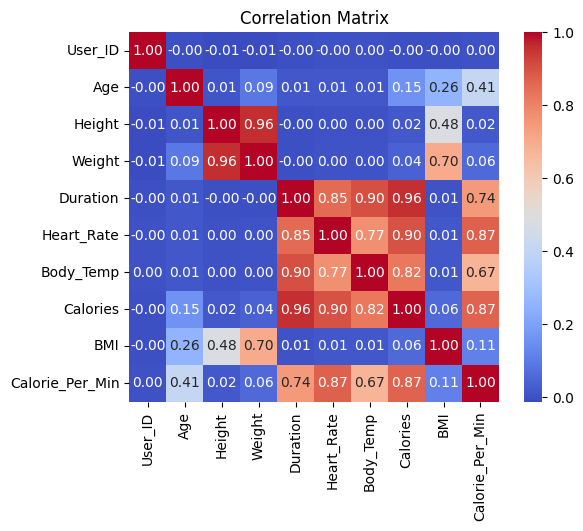

In [90]:
#plotting a heatmap for Correlation Matrix
sns.heatmap(correlation,cmap='coolwarm',square=True,cbar=True,fmt='.2f',annot=True)
plt.title('Correlation Matrix')
plt.show()

This Heatmap Demonstrate the Features which Influence other Features int the Dataset

Key Takeaways-

1-Heart Rate/Body Temprature VS Calories are Directly Proportional 0.90 and 0.82

2- Duration of Exercise Affects the total Calories and Other Bodily Metrices like HeartRate and Temprature , which is Obvious

3- Height and Weight have a Gender Dependence, which isnt surprising either


**4.2.2 Impact of Gender on Calories Burnt**

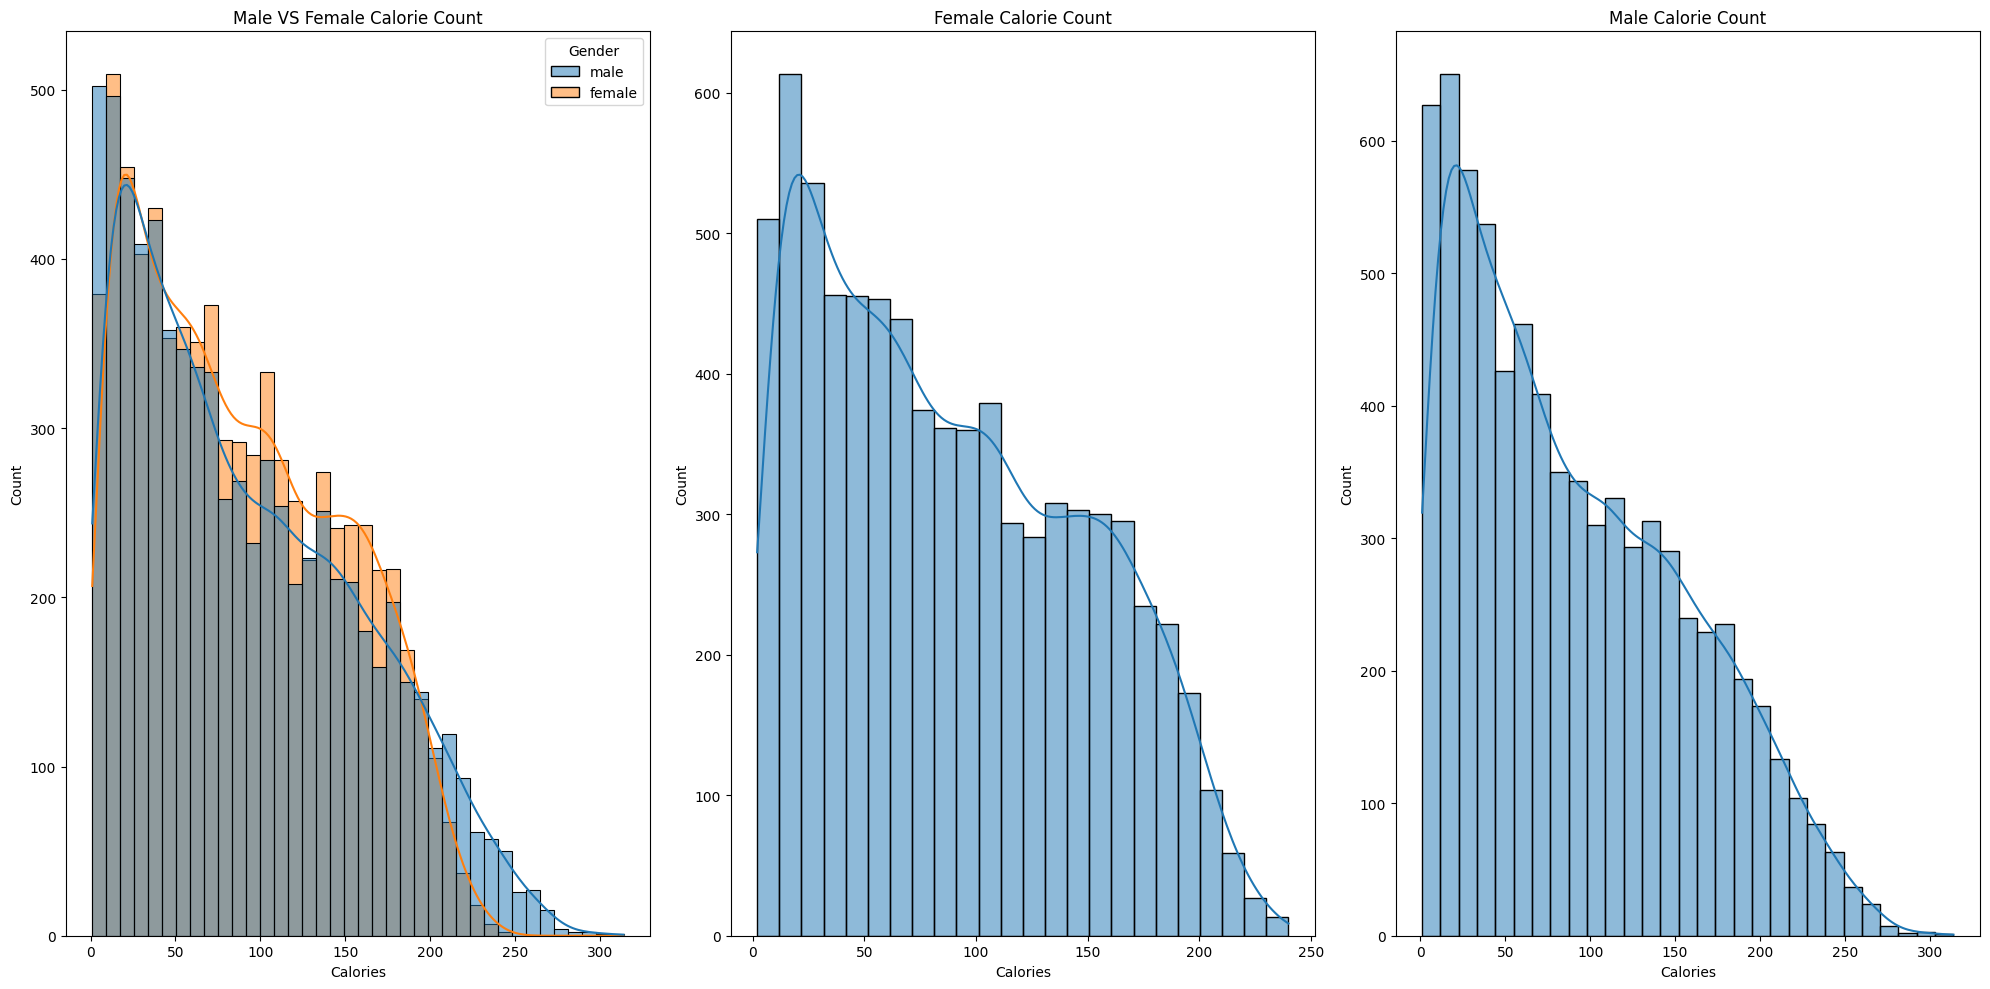

In [91]:
plt.subplots(1,3,figsize=(20,10))
plt.subplot(131)
sns.histplot(data=dataset,x='Calories',kde=True,hue='Gender')
plt.title("Male VS Female Calorie Count")
plt.subplot(132)

sns.histplot(data=dataset[dataset.Gender=='female'],x='Calories',kde=True)
plt.title("Female Calorie Count")
plt.subplot(133)
sns.histplot(data=dataset[dataset.Gender=='male'],x='Calories',kde=True)
plt.title("Male Calorie Count")
plt.tight_layout()
plt.show()

Males tend to engage in intense workout sessions burning high calories more than females, but it's the other way around for moderate to low intensity workout sessions

**4.2.3 Impact of Age on Burnt Calories**

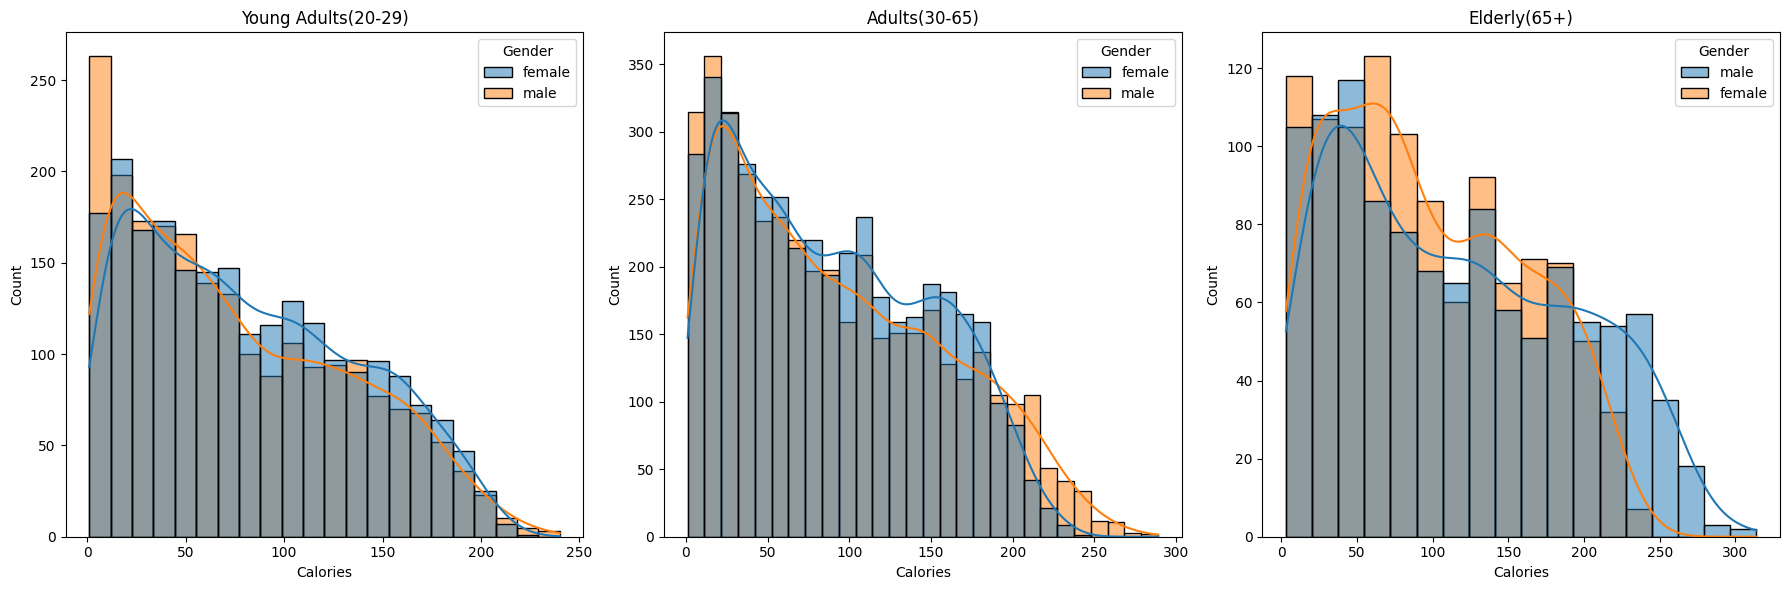

In [92]:
plt.subplots(1,3,figsize=(18,6))
plt.subplot(131)
sns.histplot(data=dataset[(dataset.Age>=20) & (dataset.Age < 30)],x='Calories',kde=True,hue='Gender')
plt.title("Young Adults(20-29)")
plt.subplot(132)
sns.histplot(data=dataset[(dataset.Age>=30) & (dataset.Age < 65)],x='Calories',kde=True,hue='Gender')
plt.title("Adults(30-65)")
plt.subplot(133)
sns.histplot(data=dataset[dataset.Age>=65],x='Calories',kde=True,hue='Gender')
plt.title("Elderly(65+)")
plt.tight_layout()
plt.show()

We can conclude that for Young Adults(20-29), females on an average lead male counterparts in Calories Burnt 

For Adults(30-65) Males generally perform more high calorie burning exercises(190+ kcal) than their counterparts.

Whereas for Elderly,total people who do High calorie burning Workouts(200+ kcal) are males rather than females. 

Females generally perform Moderate to low intense Workout Sessions, in other words , For sessions burning high number of calories (200kcal +), we can find more count of Males for every Age Group.

**4.2.4 Effect of Duration,Heart_Rate and Body Temprature on Calories**

In [93]:

def average_duration():
    # Divide Duration into intervals of 5
    bins = range(0, int(max(dataset['Duration'])) + 5, 5)
    dataset['Duration_bin'] = pd.cut(dataset['Duration'], bins=bins)

    # Calculate the average calories for each interval
    average_calories = dataset.groupby('Duration_bin')['Calories'].mean()
    print("Average Calories:\n", average_calories)
    return average_calories

def average_heartrate():
    # Divide heartrate into groups of 5
    bins = range(67, 100, 5)
    dataset['Avg_HR'] = pd.cut(dataset['Heart_Rate'], bins=bins)
    
    # Calculate the average calories for each heart rate interval
    average_HR = dataset.groupby('Avg_HR')['Calories'].mean()
    print("Average HR:\n", average_HR)
    return average_HR

    return average_calories

def average_temprature():
    # Divide body temprature into groups of 2
    bins = range(36, 43, 2)
    dataset['Avg_temp'] = pd.cut(dataset['Body_Temp'], bins=bins)
    
    # Calculate the average calories for each heart rate interval
    average_temp = dataset.groupby('Avg_temp')['Calories'].mean()
    print("Average Ttemprature:\n", average_temp)
    return average_temp


Average HR:
 Avg_HR
(67, 72]     5.057143
(72, 77]     9.560261
(77, 82]    16.362942
(82, 87]    27.118204
(87, 92]    47.331342
(92, 97]    77.391851
Name: Calories, dtype: float64
Average Calories:
 Duration_bin
(0, 5]       12.185676
(5, 10]      34.456355
(10, 15]     63.611026
(15, 20]     99.074565
(20, 25]    142.037357
(25, 30]    187.385573
Name: Calories, dtype: float64
Average Ttemprature:
 Avg_temp
(36, 38]      4.951220
(38, 40]     34.656325
(40, 42]    129.141466
Name: Calories, dtype: float64


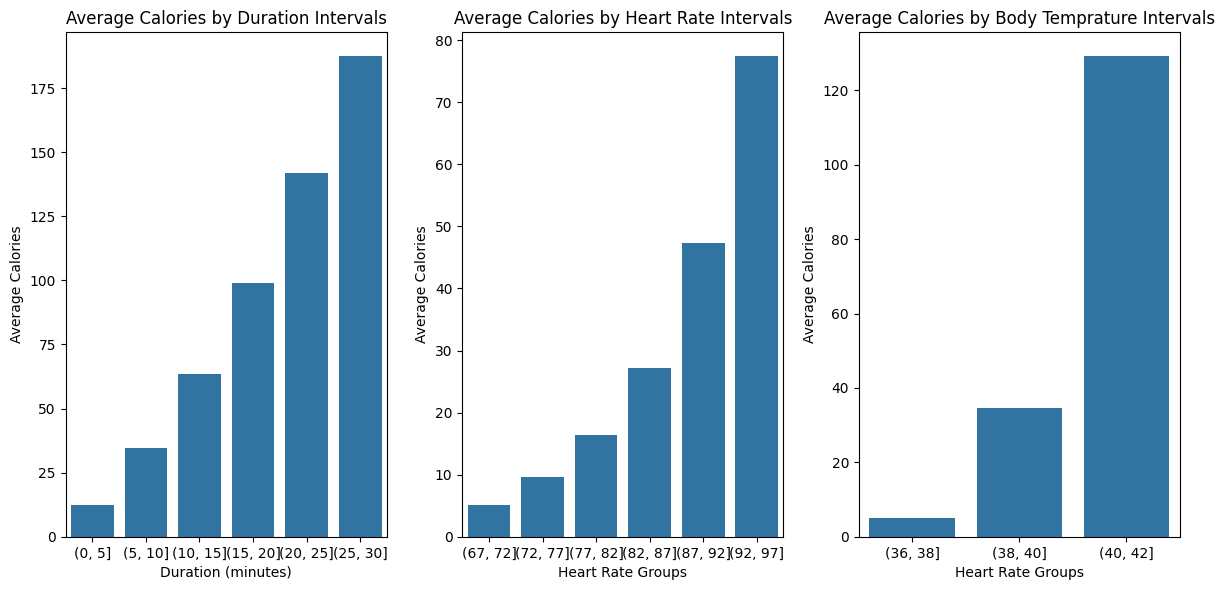

In [94]:

average_HR=average_heartrate()
average_calories=average_duration()
average_temprature=average_temprature()
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
sns.barplot(x=average_calories.index,y=average_calories.values,ax=ax[0])
ax[0].set_xlabel('Duration (minutes)')
ax[0].set_ylabel('Average Calories')
ax[0].set_title('Average Calories by Duration Intervals')

# Plotting Average Calories by Heart Rate Group
sns.barplot(x=average_HR.index, y=average_HR.values,ax=ax[1])
ax[1].set_xlabel('Heart Rate Groups')
ax[1].set_ylabel('Average Calories')
ax[1].set_title('Average Calories by Heart Rate Intervals')

sns.barplot(x=average_temprature.index, y=average_temprature.values,ax=ax[2])
ax[2].set_xlabel('Heart Rate Groups')
ax[2].set_ylabel('Average Calories')
ax[2].set_title('Average Calories by Body Temprature Intervals')


plt.tight_layout()
plt.show()


Quite Obvious and Evident that there's a linear relationship between Duration,Heart Rate to the Amount of Calories Burnt, despite

## 4.3 MultiVariate Analysis

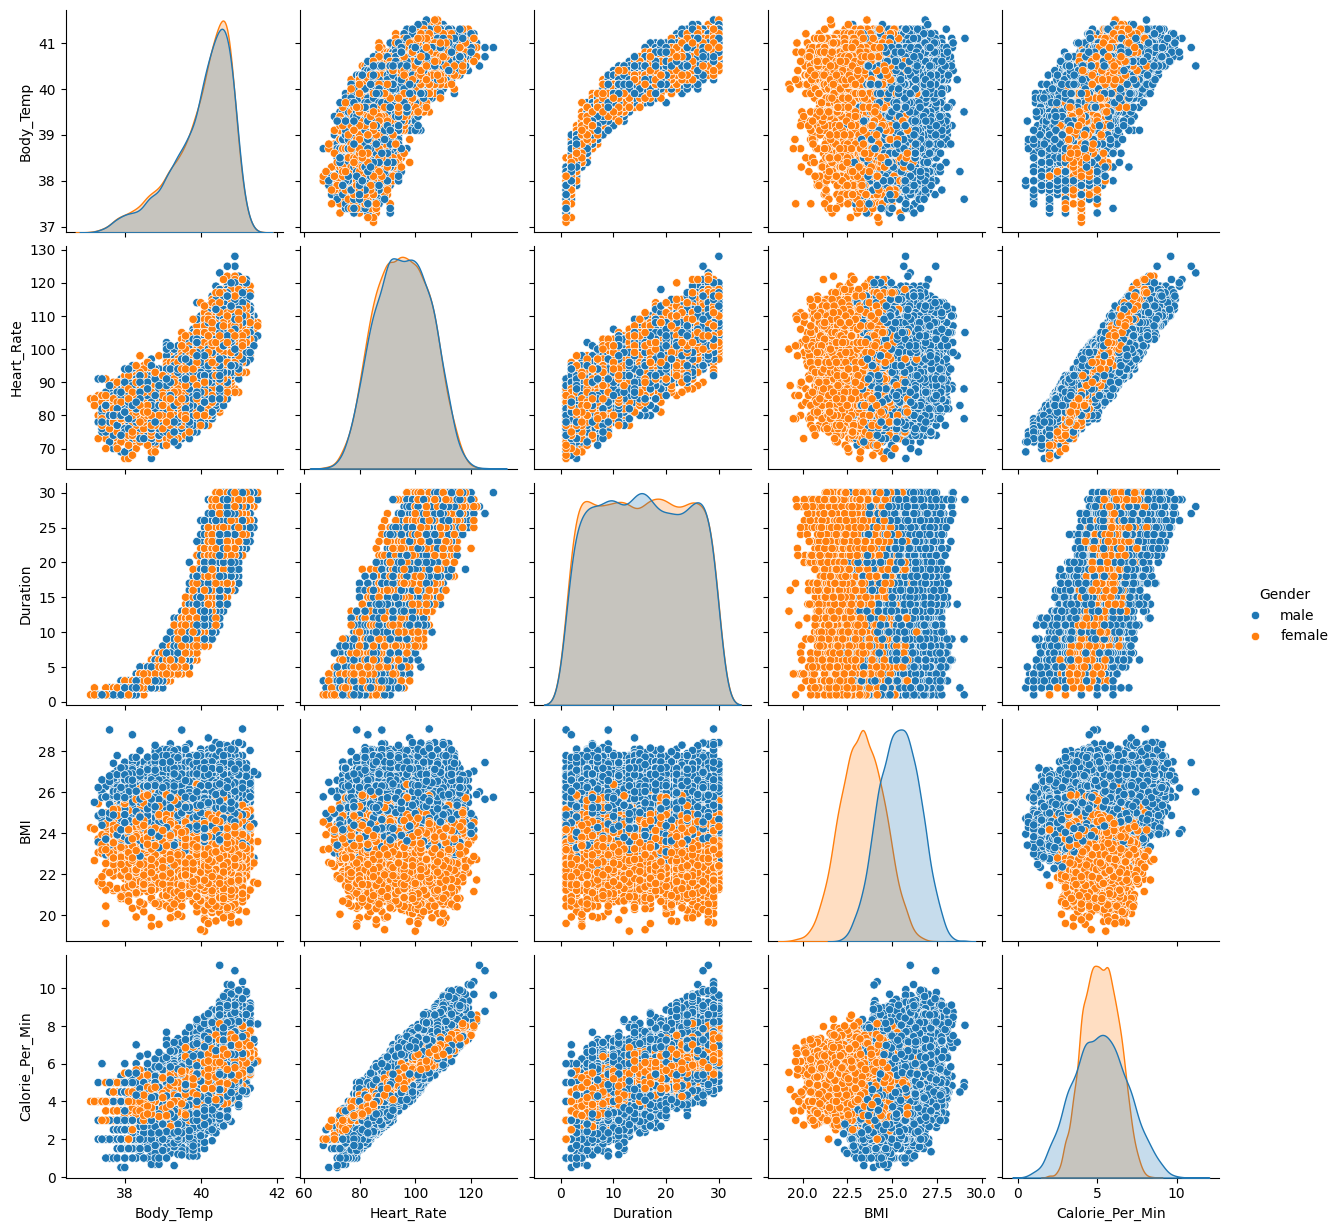

In [95]:
# Temporary DataSet to store only certain Numerical Values
temp_dataset=dataset.loc[:,['Body_Temp','Heart_Rate','Duration','BMI','Calorie_Per_Min','Gender']]
sns.pairplot(temp_dataset,hue='Gender')


Upon Close Observation, The Body temprature Seems to have a lot of Data points towards its Right, its Right Skewed, we need to check outliers for This particular column

Otherwise the Columns, ie Duration , Temprature, Hear_Rate are Linearly incresing, i.e person with High HeartBeat has more Body Temprature and Vice-Versa

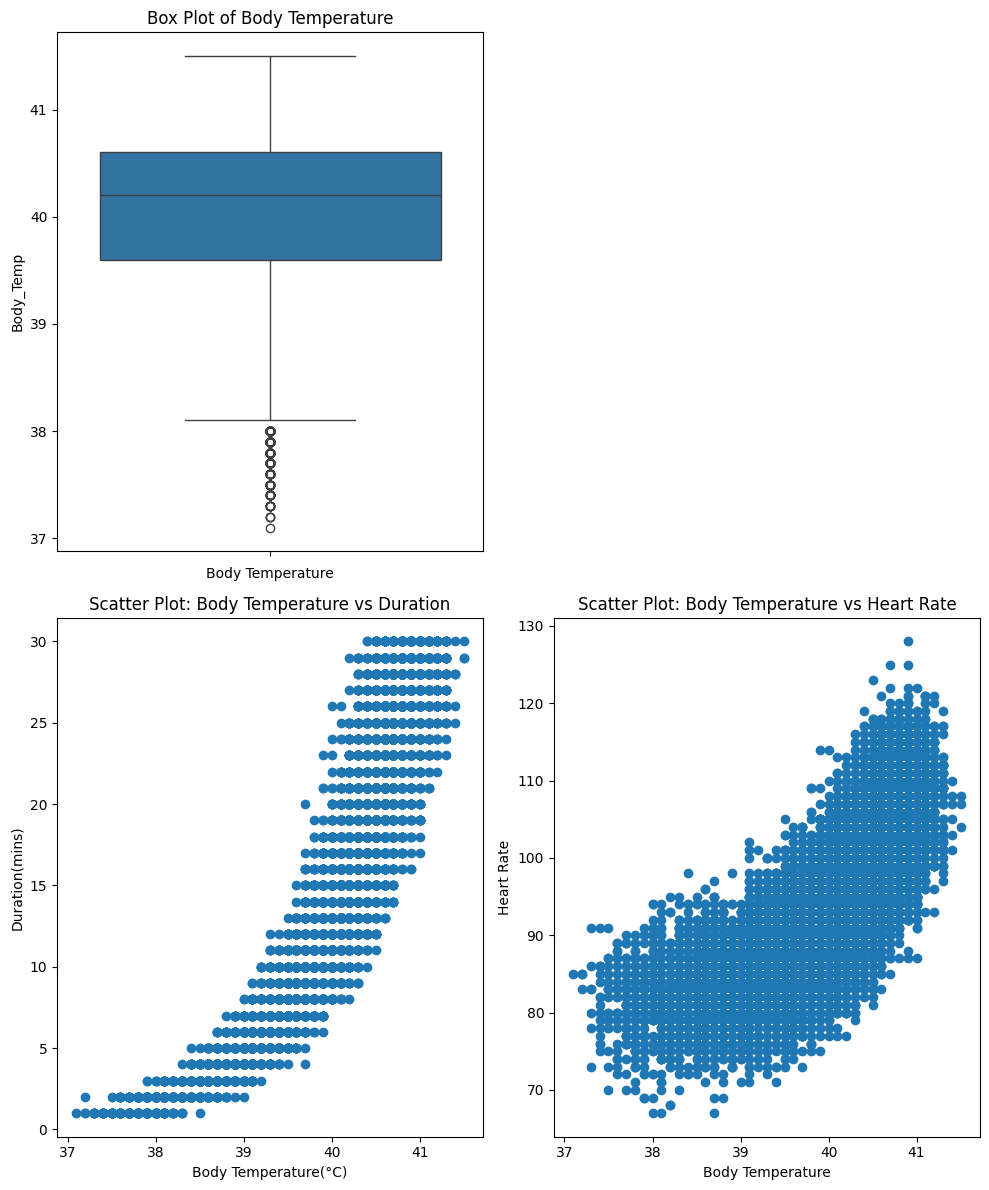

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(10, 12))

# Plotting Box Plot of Body Temperature
sns.boxplot(dataset['Body_Temp'], ax=ax[0,0])
ax[0,0].set_title('Box Plot of Body Temperature')
ax[0,0].set_xlabel('Body Temperature')
ax[0, 1].axis('off')

# Plotting Scatter Plot of Body Temperature vs Heart Rate
ax[1,1].scatter(x=dataset['Body_Temp'], y=dataset['Heart_Rate'])
ax[1,1].set_title('Scatter Plot: Body Temperature vs Heart Rate')
ax[1,1].set_xlabel('Body Temperature')
ax[1,1].set_ylabel('Heart Rate')
#Plotting Scatter Plot of Body Temprature vs Duration
ax[1,0].scatter(x=dataset['Body_Temp'], y=dataset['Duration'])
ax[1,0].set_title('Scatter Plot: Body Temperature vs Duration')
ax[1,0].set_xlabel('Body Temperature(°C)')
ax[1,0].set_ylabel('Duration(mins)')


plt.tight_layout()
plt.show()

**There seem to be No outliers in the Body Temprature , there just happen to be more number of Entries for high Body Temprature as compared to lower,** 
 **because of the fact that Working out increases body temprature upto a certain rate after which it becomes nearly constant.**

# **5 Conclusions**

1 Gender has Little to No Role in Determining Calories after Workout, although BMI depends on Gender, Females are generally found with lower BMI Values than Males, but Females are indulged in more moderate and low intensity sessions(Low Calories Burnt per Minute) than men.

2 BMI which is essentially Height and Weight relation doesn't affects The Calories Burnt as such, also Females tend to have lower BMI than Males. 

3 Duration of the Exercise is Directly Proportional to the Heart Rate and Body Temprature, upto a certain value, after which Temprature and Heart rate become nearly Constant.

4 Duration , Heart Rate and Temprature are Directly responsible fot the amount of Calories burnt.

5. All the Colunns don't have any outliers, Null Values to treat.